# Exploratory Data Analysis (EDA)

In [18]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('../data/clean/dataset.csv')

display(df.head())

/var/folders/t_/k5bhrc1x419crrfg_t8zp5nm0000gp/T/ipykernel_3779/241528515.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/clean/dataset.csv')


,date,day_of_week,month,channelGrouping,fullVisitorId,visitNumber,visitStartTime,device_deviceCategory,geoNetwork_continent,geoNetwork_country,totals_hits,totals_pageviews,totals_bounces,totals_timeOnSite,totals_transactions,totals_transactionRevenue,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_isTrueDirect
0,2017-10-16,0,10,Organic Search,3162355547410993243,1,2017-10-17 00:00:50,desktop,Europe,Germany,1,1,1,0,0,0,(not set),google,organic,True
1,2017-10-16,0,10,Referral,8934116514970143966,6,2017-10-16 17:51:47,desktop,Americas,United States,2,2,0,28,0,0,(not set),sites.google.com,referral,True
2,2017-10-16,0,10,Direct,7992466427990357681,1,2017-10-17 00:53:33,mobile,Americas,United States,2,2,0,38,0,0,(not set),(direct),(none),True
3,2017-10-16,0,10,Organic Search,9075655783635761930,1,2017-10-16 16:04:11,desktop,Asia,Turkey,2,2,0,1,0,0,(not set),google,organic,True
4,2017-10-16,0,10,Organic Search,6960673291025684308,1,2017-10-16 21:49:12,desktop,Americas,Mexico,2,2,0,52,0,0,(not set),google,organic,True


## Basic Overview

In [21]:
df.shape

(1000000, 20)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 20 columns):
 #   Column                      Non-Null Count    Dtype 
---  ------                      --------------    ----- 
 0   date                        1000000 non-null  object
 1   day_of_week                 1000000 non-null  int64 
 2   month                       1000000 non-null  int64 
 3   channelGrouping             1000000 non-null  object
 4   fullVisitorId               1000000 non-null  object
 5   visitNumber                 1000000 non-null  int64 
 6   visitStartTime              1000000 non-null  object
 7   device_deviceCategory       1000000 non-null  object
 8   geoNetwork_continent        1000000 non-null  object
 9   geoNetwork_country          1000000 non-null  object
 10  totals_hits                 1000000 non-null  int64 
 11  totals_pageviews            1000000 non-null  int64 
 12  totals_bounces              1000000 non-null  int64 
 13  totals_timeOn

In [23]:
# Number of unique customers
unique_count = df['fullVisitorId'].nunique()
print(f"Number of unique customers {unique_count}")

Number of unique customers 850351


<br>

## Device and Geographic Information
### Columns: `geoNetwork_country`

#### Top 10 countries by visit count

In [26]:
# Set Seaborn style
sns.set_theme(style="whitegrid")

In [27]:
# Top 10 countries by visit count
top_countries = df['geoNetwork_country'].value_counts().head(10).index

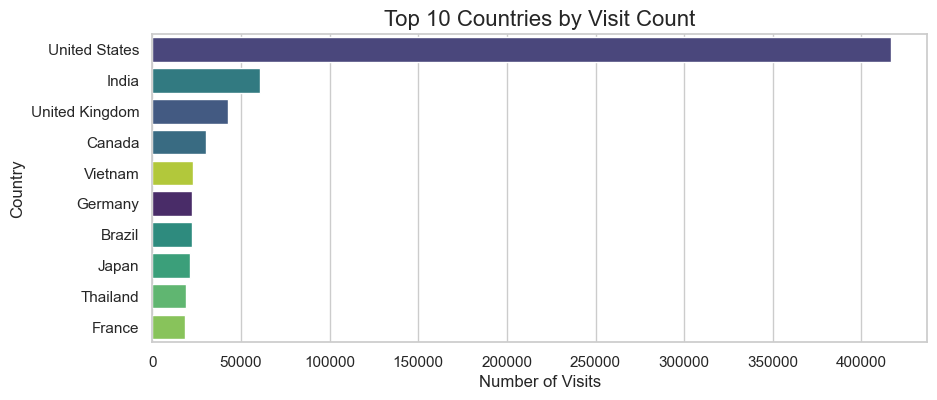

In [28]:
plt.figure(figsize=(10, 4))
sns.countplot(y='geoNetwork_country', data=df[df['geoNetwork_country'].isin(top_countries)], 
              order=top_countries, palette="viridis",  hue= 'geoNetwork_country', legend=False)

plt.title("Top 10 Countries by Visit Count", fontsize=16)
plt.xlabel("Number of Visits", fontsize=12)
plt.ylabel("Country", fontsize=12)

plt.show()

#### Average revenue by country

In [30]:
# Average revenue by country

# Step 1: Calculate total revenue per country
total_revenue_by_country = df.groupby('geoNetwork_country')['totals_transactionRevenue'].sum()

# Step 2: Get the top 10 countries by total revenue
top_10_countries = total_revenue_by_country.nlargest(10).index

# Step 3: Filter the DataFrame for only the top 10 countries
df_top_countries = df[df['geoNetwork_country'].isin(top_10_countries)]

# Step 4: Calculate average revenue per country for the top 10 countries
avg_revenue_by_country = df_top_countries.groupby('geoNetwork_country')['totals_transactionRevenue'].mean()

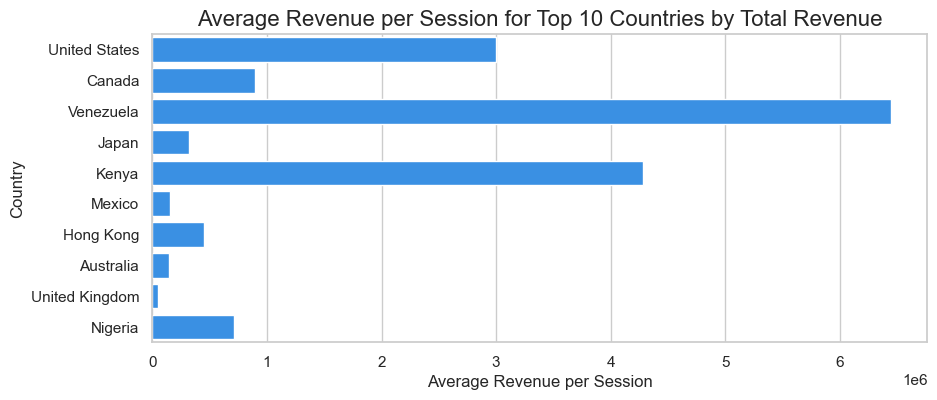

In [31]:
plt.figure(figsize=(10, 4))
sns.barplot(x=avg_revenue_by_country.values, y=avg_revenue_by_country.index, order=top_10_countries, color="dodgerblue")

plt.title("Average Revenue per Session for Top 10 Countries by Total Revenue", fontsize=16)
plt.xlabel("Average Revenue per Session", fontsize=12)
plt.ylabel("Country", fontsize=12)

plt.show()

##### Outliers identification:

In [33]:
# Filter the DataFrame for Venezuela, Kenya, Nigeria and United States
countries_of_interest = ['Venezuela', 'Kenya', 'Nigeria', 'United States']
df_specific_countries = df[df['geoNetwork_country'].isin(countries_of_interest)]

# Count the number of transactions (non-zero revenue) for each of these countries
transaction_count_by_country = df_specific_countries[df_specific_countries['totals_transactionRevenue'] > 0] \
                                .groupby('geoNetwork_country')['totals_transactionRevenue'] \
                                .count()

# Display the result
print(transaction_count_by_country)

geoNetwork_country
Kenya                2
Nigeria              1
United States    10275
Venezuela           49
Name: totals_transactionRevenue, dtype: int64


In [34]:
# Remove countries identified as outliers: Venezuela, Kenya and Nigeria
outlier_countries = ['Venezuela', 'Kenya', 'Nigeria']

# Remove rows where the country is one of the outliers
df = df[~df['geoNetwork_country'].isin(outlier_countries)]

In [35]:
df.shape

(994870, 20)

In [36]:
# Number of unique customers
unique_count = df['fullVisitorId'].nunique()
print(f"Number of unique customers {unique_count}")

Number of unique customers 845714


In [37]:
df.to_csv('../data/clean/dataset_2.csv', index=False) 

#### Updated Average revenue per country

In [39]:
# Step 1: Calculate total revenue per country
total_revenue_by_country = df.groupby('geoNetwork_country')['totals_transactionRevenue'].sum()

# Step 2: Get the top 10 countries by total revenue
top_10_countries = total_revenue_by_country.nlargest(10).index

# Step 3: Filter the DataFrame for only the top 10 countries
df_top_countries = df[df['geoNetwork_country'].isin(top_10_countries)]

# Step 4: Calculate average revenue per country for the top 10 countries
avg_revenue_by_country = df_top_countries.groupby('geoNetwork_country')['totals_transactionRevenue'].mean()

# Sort the results from highest to lowest
avg_revenue_by_country = avg_revenue_by_country.sort_values(ascending=False)

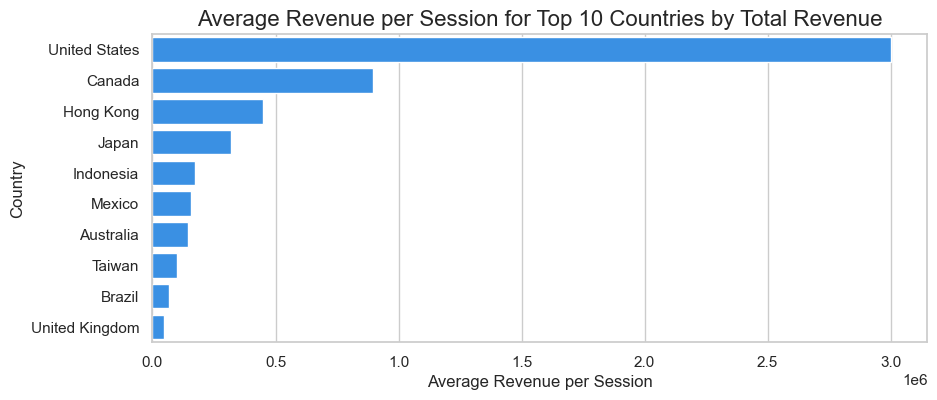

In [40]:
plt.figure(figsize=(10, 4))
sns.barplot(x=avg_revenue_by_country.values, y=avg_revenue_by_country.index, color="dodgerblue")

plt.title("Average Revenue per Session for Top 10 Countries by Total Revenue", fontsize=16)
plt.xlabel("Average Revenue per Session", fontsize=12)
plt.ylabel("Country", fontsize=12)

plt.show()

<br>

## Date and Time Analysis (Categorical data)
### Columns: `date`, `day_of_week`, `month`

#### Distribution of visits by day of the week

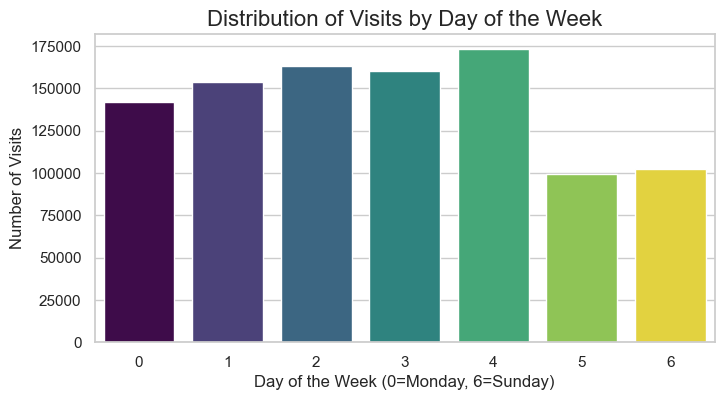

In [43]:
# Distribution of visits by day of the week
plt.figure(figsize=(8, 4))
sns.countplot(x='day_of_week', data=df, palette="viridis", hue='day_of_week', legend=False)

plt.title("Distribution of Visits by Day of the Week", fontsize=16)
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)", fontsize=12)
plt.ylabel("Number of Visits", fontsize=12)

plt.show()

- Visits are more frequent on Mondays through Fridays, with a peak on Fridays.
- Traffic decreases significantly on weekends (Saturdays and Sundays).

##### Average revenue by day of the week

In [46]:
# Average revenue by day of the week
avg_revenue_day = df.groupby('day_of_week')['totals_transactionRevenue'].mean()

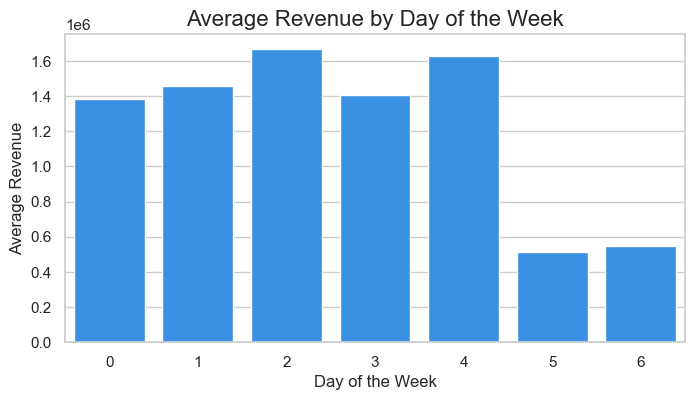

In [47]:
plt.figure(figsize=(8, 4))
sns.barplot(x=avg_revenue_day.index, y=avg_revenue_day.values, color="dodgerblue")

plt.title("Average Revenue by Day of the Week", fontsize=16)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Average Revenue", fontsize=12)

plt.show()

- The highest average revenue is observed on Wednesdays and Fridays.
- This suggests that midweek visits are more likely to result in purchases or higher revenue per visit, in contrast to weekends.

#### Distribution of visits by month

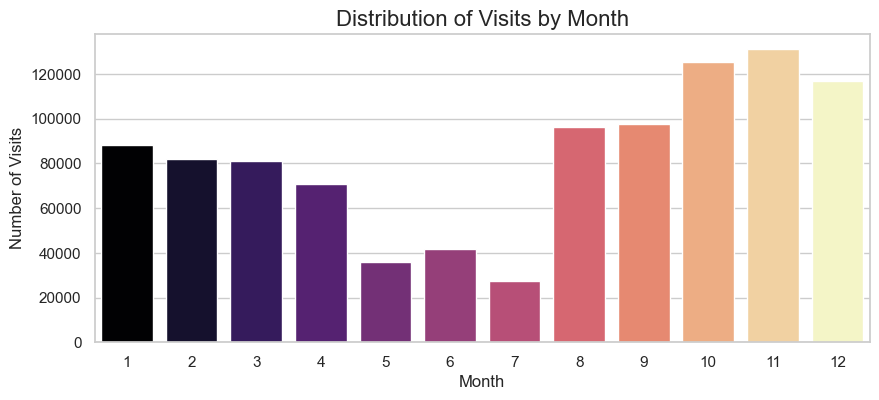

In [50]:
# Distribution of visits by month
plt.figure(figsize=(10, 4))
sns.countplot(x='month', data=df, palette="magma", hue='month', legend=False)

plt.title("Distribution of Visits by Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Visits", fontsize=12)

plt.show()

- Visits are generallyspread across the year, with higher numbers in October, November, and December.
- There’s a notable increase in visits starting from August through December, suggesting higher traffic in the second half of the year, potentially due to holiday shopping.

##### Average revenue by month

In [53]:
# Average revenue by month
avg_revenue_month = df.groupby('month')['totals_transactionRevenue'].mean()

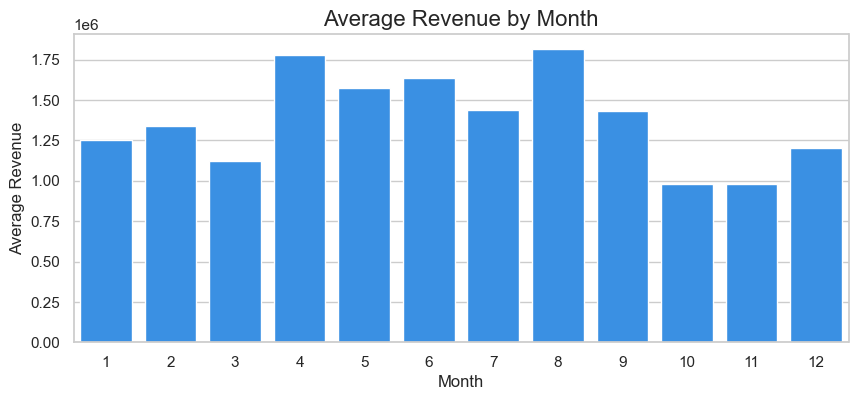

In [54]:
plt.figure(figsize=(10, 4))
sns.barplot(x=avg_revenue_month.index, y=avg_revenue_month.values, color="dodgerblue")

plt.title("Average Revenue by Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Revenue", fontsize=12)

plt.show()

- **April** and **August** are peak revenue months but don’t align with the highest visit months, which are primarily in the last quarter (October to December).
- This may indicate that April and August have higher-quality traffic or are times of high-value transactions. For instance, there may be seasonal campaigns, special events, or specific customer behaviors that increase revenue even if the number of visits is not the highest.
- October to December see high visit volumes, likely driven by holiday traffic, but lower average revenue suggests an opportunity to improve conversion in Q4.

<br>

## Session Information
### Columns:`visitNumber`

#### Distribution of visit numbers

<function matplotlib.pyplot.show(close=None, block=None)>

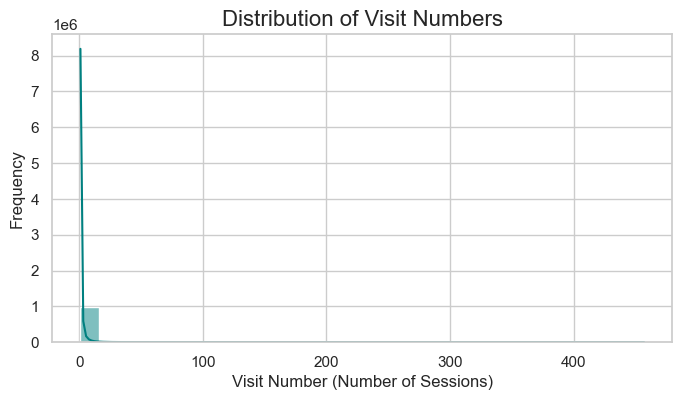

In [58]:
# Distribution of visit numbers
plt.figure(figsize=(8,4))
sns.histplot(df['visitNumber'], bins=30, kde=True, color='teal')

plt.title("Distribution of Visit Numbers", fontsize=16)
plt.xlabel("Visit Number (Number of Sessions)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.show

- The vast majority of users have a visitNumber of 1, meaning that most users visit the site only once.
- After the initial visit, the frequency of higher visit numbers drops off significantly, with very few users having multiple sessions.
- There are some extreme cases with visitNumber values going up to over 400, which could indicate very loyal or returning users, but these are exceptionally rare.

#### Average revenue by visit number

In [61]:
# Average revenue by visit number
avg_revenue_visit_number = df.groupby('visitNumber')['totals_transactionRevenue'].mean()

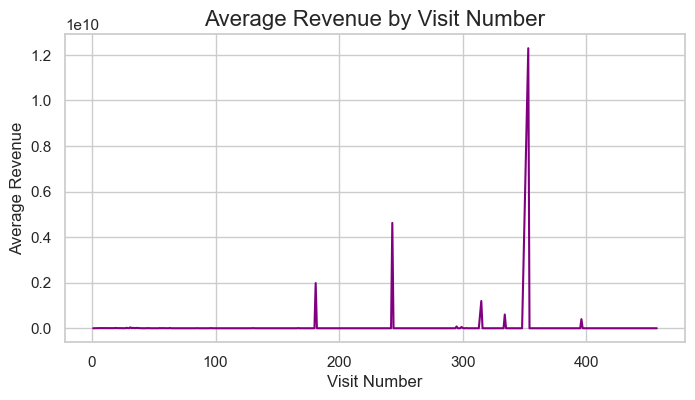

In [62]:
plt.figure(figsize=(8, 4))
sns.lineplot(x=avg_revenue_visit_number.index, y=avg_revenue_visit_number.values, color="purple")

plt.title("Average Revenue by Visit Number", fontsize=16)
plt.xlabel("Visit Number", fontsize=12)
plt.ylabel("Average Revenue", fontsize=12)

plt.show()

- For most visit numbers, average revenue is quite low, and then there are sharp spikes in revenue at specific visit numbers (e.g., around 200, 300).
- These spikes are unusual and suggest that a small number of repeat sessions contributed very high revenue on those specific visit numbers.
- These high spikes could represent loyal customers who return multiple times and eventually make large purchases, or they could indicate unusual behavior that might require further investigation (e.g., promotions or bulk purchases).

<br>

## Device Information
### Columns:`device_deviceCategory`

#### Distribution of visits by device category

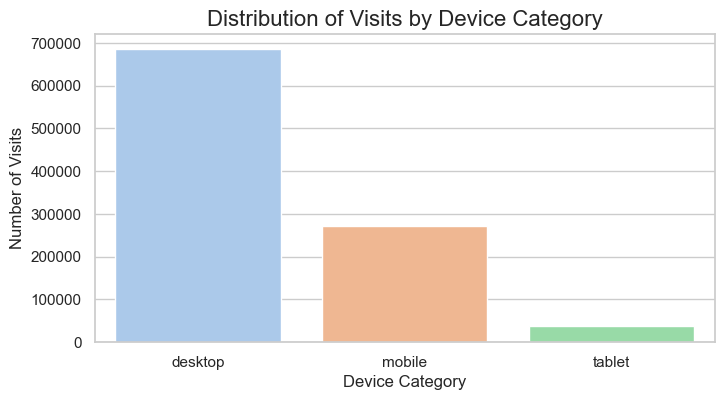

In [66]:
# Distribution of visits by device category
plt.figure(figsize=(8, 4))
sns.countplot(x='device_deviceCategory', data=df, palette="pastel", hue='device_deviceCategory', legend=False)

plt.title("Distribution of Visits by Device Category", fontsize=16)
plt.xlabel("Device Category", fontsize=12)
plt.ylabel("Number of Visits", fontsize=12)

plt.show()

#### Average revenue by device category

In [68]:
# Average revenue by device category
avg_revenue_device = df.groupby('device_deviceCategory')['totals_transactionRevenue'].mean()

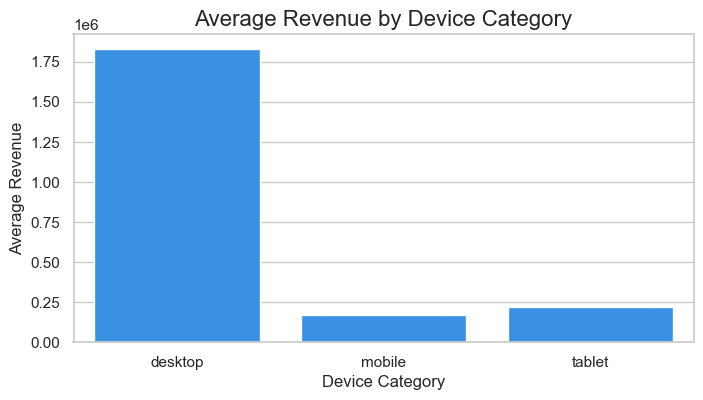

In [69]:
plt.figure(figsize=(8, 4))
sns.barplot(x=avg_revenue_device.index, y=avg_revenue_device.values, color="dodgerblue")

plt.title("Average Revenue by Device Category", fontsize=16)
plt.xlabel("Device Category", fontsize=12)
plt.ylabel("Average Revenue", fontsize=12)

plt.show()

<br>

## Engagement Metrics
### Columns: `totals_pageviews`

#### Distribution of totals_pageviews

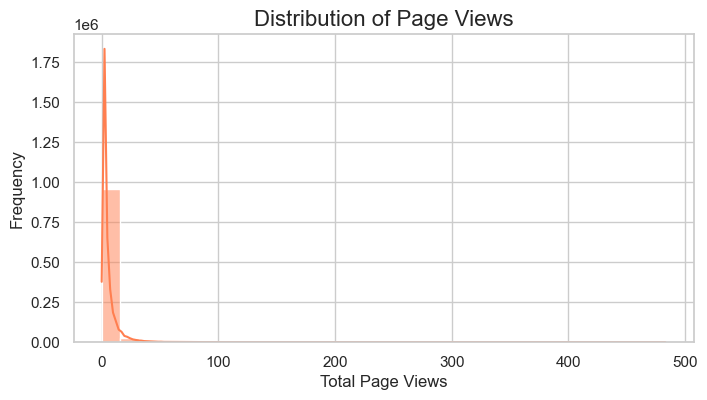

In [72]:
# Distribution of totals_pageviews
plt.figure(figsize=(8, 4))
sns.histplot(df['totals_pageviews'], bins=30, kde=True, color="coral")

plt.title("Distribution of Page Views", fontsize=16)
plt.xlabel("Total Page Views", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.show()


- The distribution of page views is highly right-skewed.
- A vast majority of sessions have relatively low page views (clustered around 0 to 10).
- As the number of page views increases, the frequency decreases sharply, with very few sessions reaching higher page view counts (over 100).
- There are very few sessions with exceptionally high page views, which could represent highly engaged users or possibly users who are indecisive or exploring extensively before making a purchase.

#### Average revenue by pageviews

In [75]:
# Average revenue by pageviews
avg_revenue_pageviews = df.groupby('totals_pageviews')['totals_transactionRevenue'].mean()

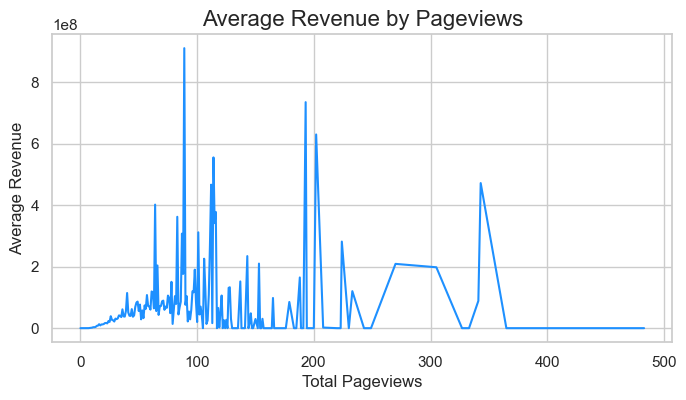

In [76]:
plt.figure(figsize=(8, 4))
sns.lineplot(x=avg_revenue_pageviews.index, y=avg_revenue_pageviews.values, color="dodgerblue")

plt.title("Average Revenue by Pageviews", fontsize=16)
plt.xlabel("Total Pageviews", fontsize=12)
plt.ylabel("Average Revenue", fontsize=12)

plt.show()

- The average revenue per session increases irregularly with more page views, but there are notable spikes at certain points (e.g., around 100 and 200 page views).
- The graph shows high volatility, with sudden jumps and drops in average revenue.
- Although there are high spikes, they don’t follow a consistent upward trend, suggesting that a higher number of page views doesn’t necessarily correlate directly with higher revenue.

<br>

## Traffic Source Analysis
### Columns: `trafficSource_medium`

#### Distribution of traffic source medium

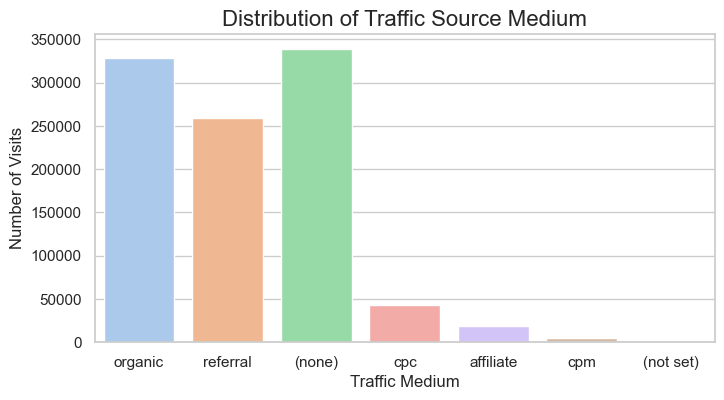

In [80]:
# Distribution of traffic source medium
plt.figure(figsize=(8, 4))
sns.countplot(x='trafficSource_medium', data=df, palette="pastel", hue='trafficSource_medium', legend=False)

plt.title("Distribution of Traffic Source Medium", fontsize=16)
plt.xlabel("Traffic Medium", fontsize=12)
plt.ylabel("Number of Visits", fontsize=12)

plt.show()

#### Average revenue by traffic source medium

In [82]:
#Average revenue by traffic source medium
avg_revenue_source_medium = df.groupby('trafficSource_medium')['totals_transactionRevenue'].mean().nlargest(10)

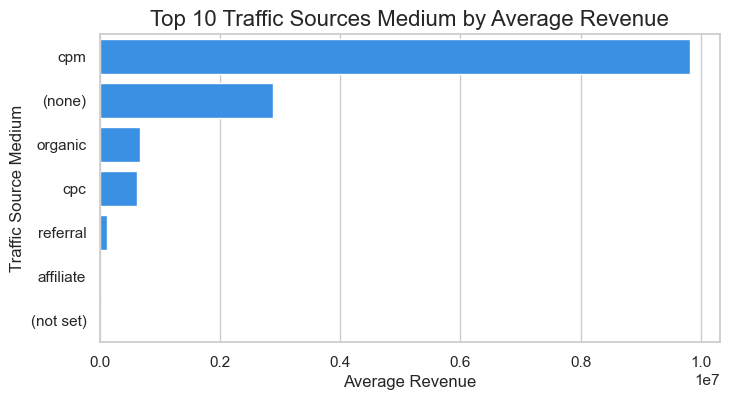

In [83]:
plt.figure(figsize=(8, 4))
sns.barplot(x=avg_revenue_source_medium.values, y=avg_revenue_source_medium.index, color="dodgerblue")

plt.title("Top 10 Traffic Sources Medium by Average Revenue", fontsize=16)
plt.xlabel("Average Revenue", fontsize=12)
plt.ylabel("Traffic Source Medium", fontsize=12)

plt.show()

- Highest Revenue Source - CPM: "CPM" (Cost per Thousand Impressions) CPM ads generate the highest average revenue but contribute relatively few visits. This could mean CPM campaigns are highly targeted and attract users who are more likely to make high-value purchases. Although CPM ads don't drive a large volume of traffic, the visitors they do attract appear to have a high conversion rate or larger transaction sizes.
- Second Highest - Direct Traffic: "(none)", has both high average revenue and a relatively high visit count. This is often a strong indicator of brand loyalty or customer familiarity. People coming directly to the site may already know the brand and are therefore more likely to make purchases, even if the visit volume is lower than organic and referral traffic.
- While organic and referral traffic bring in the largest number of visits, their average revenue is relatively low. This suggests that while many visitors find the site through search engines or links from other sites, they may be **browsing without purchasing** or making low-value transactions.  This may indicate a need to optimize for conversions from organic and referral traffic or target high-value keywords for organic traffic.

<br>

## Revenue Analysis by Session and User
### Columns: `totals_transactionRevenue`, `fullVisitorId`

#### Distribution of Transaction Revenue at the session level
— each row represents a session, so revenue is not aggregated by user.

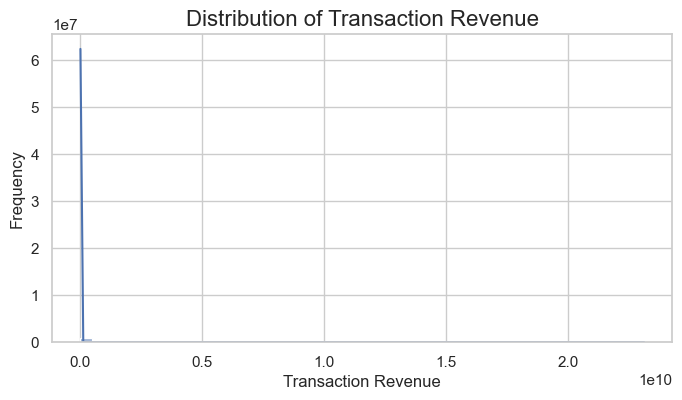

In [90]:
# Distribution of transaction revenue at the session level
plt.figure(figsize=(8, 4))
sns.histplot(df['totals_transactionRevenue'], bins=50, kde=True)

plt.title("Distribution of Transaction Revenue", fontsize=16)
plt.xlabel("Transaction Revenue", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.show()

#### Log-Transformed Transactional Revenue per Session
Since revenue is right-skewed, applying a log transformation can make it easier to observe the distribution of revenue values without the influence of extreme values.

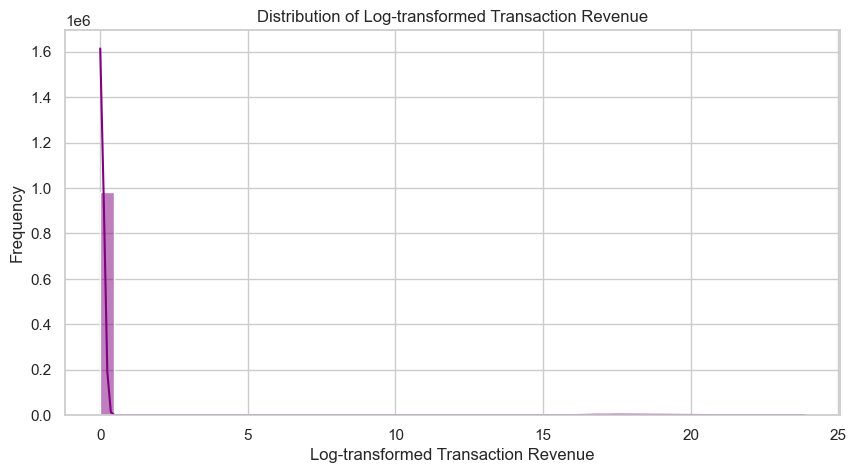

In [92]:
# Log-transform and plot again to check skewness reduction
df['log_transactionRevenue'] = np.log1p(df['totals_transactionRevenue'])  # np.log1p is log(x+1)

plt.figure(figsize=(10, 5))
sns.histplot(df['log_transactionRevenue'], bins=50, kde=True, color='purple')

plt.title("Distribution of Log-transformed Transaction Revenue")
plt.xlabel("Log-transformed Transaction Revenue")
plt.ylabel("Frequency")

plt.show()

- The first plot shows that most sessions have very low or zero revenue, with a sharp spike at the lower end of the revenue scale.
- The distribution is **highly right-skewed** — a large number of sessions generate little to no revenue, while only a few sessions result in high revenue amounts.
- The second plot shows the distribution of **log-transformed transaction revenue**. The log transformation compresses the wide range of values, which reduces the influence of extreme outliers and makes the distribution appear more spread out. Despite the transformation, the distribution still shows a high concentration of values near zero. 
- This pattern is typical in e-commerce data, where a small fraction of sessions (likely from high-value customers) contribute disproportionately to the overall revenue.

In [94]:
df.to_csv('../data/clean/dataset_3.csv', index=False) 

In [95]:
df.shape

(994870, 21)

<br>

#### Distribution of Total Revenue aggregated per user

- Group data by `fullVisitorId` and sum `totals_transactionRevenue` to get total revenue per user.
- Analyze the user-level revenue distribution to understand spending behavior across different customers.

In [98]:
# Revenue aggregated per user
user_revenue = df.groupby('fullVisitorId')['totals_transactionRevenue'].sum()

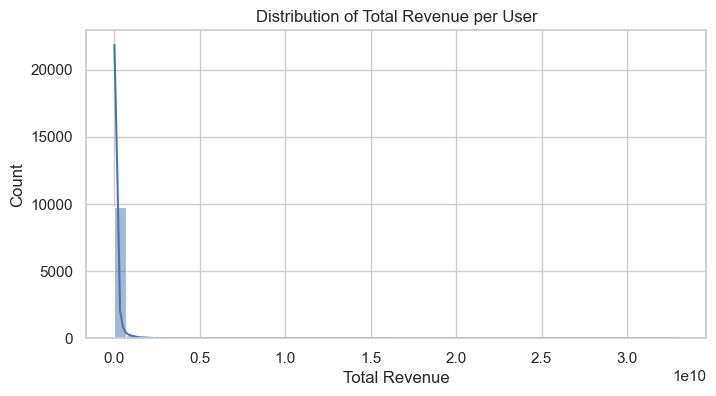

In [100]:
# Plot histogram of the total revenue
plt.figure(figsize=(8, 4))
sns.histplot(user_revenue[user_revenue > 0], bins=50, kde=True) 
# only users who made purchases are included in the plot

plt.title("Distribution of Total Revenue per User")
plt.xlabel("Total Revenue")

plt.show()


- The distribution is highly right-skewed. There is a large spike on the far left, showing that most users have a very low total revenue.
- This pattern is typical in revenue data, where a large number of users generate little to no revenue (likely due to non-purchasing users), and a small number of users contribute very high amounts.

#### Log-Transformed Transactional Revenue per User

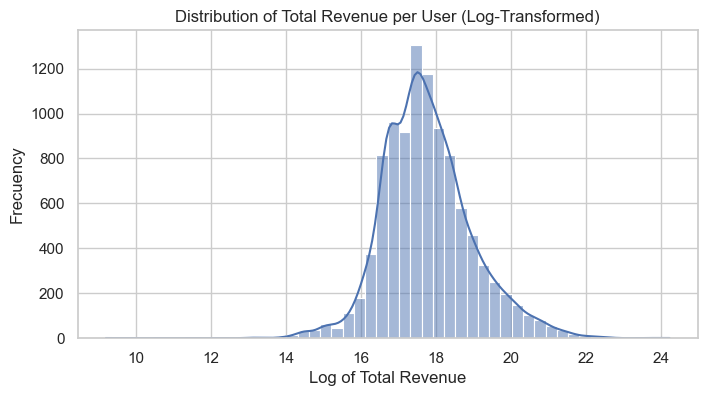

In [102]:
# Plot histogram of log-transformed revenue
log_user_revenue = np.log1p(user_revenue[user_revenue > 0])
plt.figure(figsize=(8, 4))
sns.histplot(log_user_revenue, bins=50, kde=True)


plt.title("Distribution of Total Revenue per User (Log-Transformed)")
plt.xlabel("Log of Total Revenue")
plt.ylabel("Frecuency")

plt.show()

- After applying a log transformation, the distribution becomes more bell-shaped and **approximately normal**.
- A peak around 17–18 in log-transformed revenue corresponds to a certain revenue range (in the raw scale, this would be around: $2.7M to  $6.4M when we convert back from log scale).
This insight suggests that, while most users are low-revenue, there is a significant portion of users clustered around a certain moderate revenue range. 

#### Box-Plot Transaction Revenue (Raw)

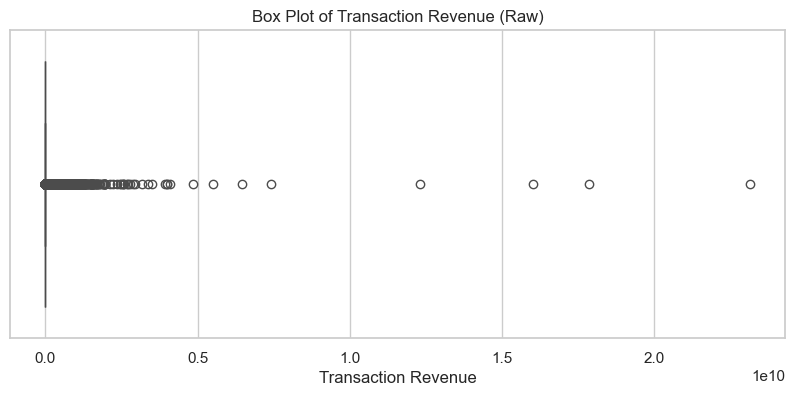

In [119]:
# Plot box plot for raw revenue values
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['totals_transactionRevenue'])

plt.title("Box Plot of Transaction Revenue (Raw)")
plt.xlabel("Transaction Revenue")

plt.show()

- This distribution is highly skewed to the right, with a long tail of extreme values.
- The concentration of data points near zero indicates that most transactions generate very low revenue, with a small number of users generating very high revenue.
- There are a few extremely high values that are plotted as outliers far from the main distribution. These points are spread out, with the furthest one reaching beyond 2.0e10(20 billion in revenue).
- The presence of these extreme outliers could potentially affect any models that use this raw revenue data, as the outliers would dominate the scale.
- This plot suggests that there may be a need for log transformation or other techniques to handle the skewness and make the data more manageable for analysis.

#### Box-Plotfor log-transformed Revenue

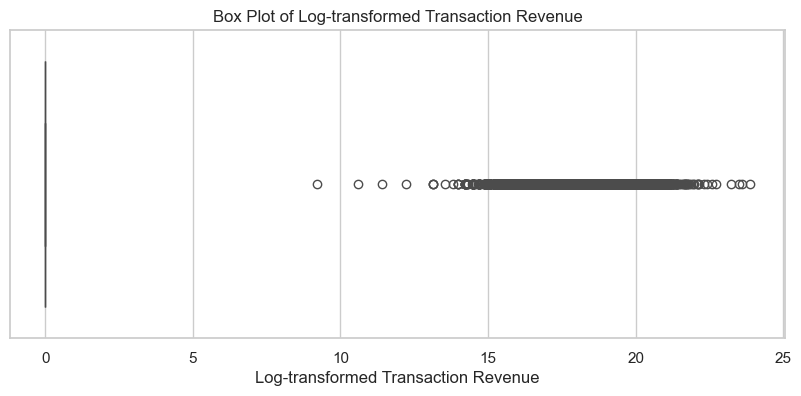

In [115]:
# Apply log transformation only to non-zero values
df['log_transactionRevenue'] = np.log1p(df['totals_transactionRevenue'])  # log(x+1) to handle zero values
plt.figure(figsize=(10, 4))

sns.boxplot(x=df['log_transactionRevenue'])
plt.title("Box Plot of Log-transformed Transaction Revenue")
plt.xlabel("Log-transformed Transaction Revenue")

plt.show()

- The log transformation effectively reduces the impact of extreme values, compressing the scale and bringing the outliers closer to the main body of the data.
- The main body of the data is now distributed more evenly, with the whiskers extending further out, indicating a wider range of values that fit within the IQR limits.
- Even after log transformation, there are still some outliers on the right, but they are much closer to the main distribution than in the raw plot. The values cluster around 15-20 on the log scale.
- The box plot now shows a more symmetric distribution, which is beneficial for certain types of models, especially those that assume a more normal distribution.

#### Box-Plot Transaction Revenue (Raw) for Purchasing users only (filtering out zero revenues)

In [127]:
# Filter for non-zero revenue only
non_zero_revenue = df[df['totals_transactionRevenue'] > 0]['totals_transactionRevenue']

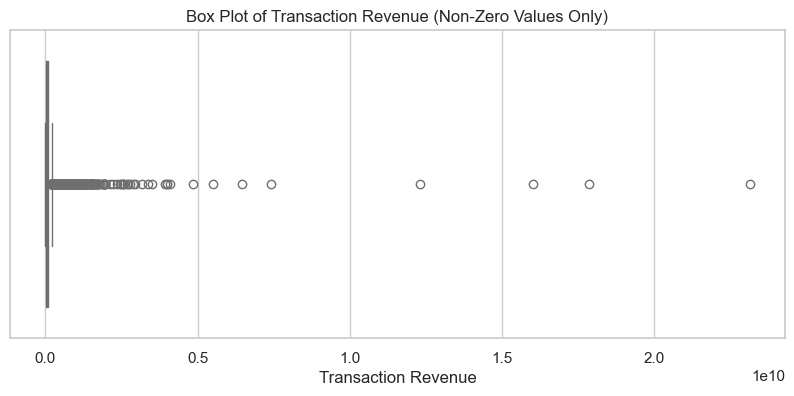

In [145]:
# Plot box plot for non-zero raw revenue values
plt.figure(figsize=(10, 4))
sns.boxplot(x=non_zero_revenue, color='skyblue')

plt.title("Box Plot of Transaction Revenue (Non-Zero Values Only)")
plt.xlabel("Transaction Revenue")

plt.show()

- The main box (central 50% of the data) is very narrow and close to zero, showing that most revenue values are relatively small even among paying users.
- Even among users who generate revenue, most of them contribute relatively small amounts, while a few users generate very large revenues, which appear as outliers.
- This highly skewed distribution suggests that revenue is dominated by a small number of high-value customers, following a pattern similar to the 80/20 rule (where a small proportion of users generate most of the revenue).
- This distribution may be challenging for some models, as the high variance and extreme outliers can affect model stability and performance.

#### Box-Plot for log-transformed non-zero Revenue values

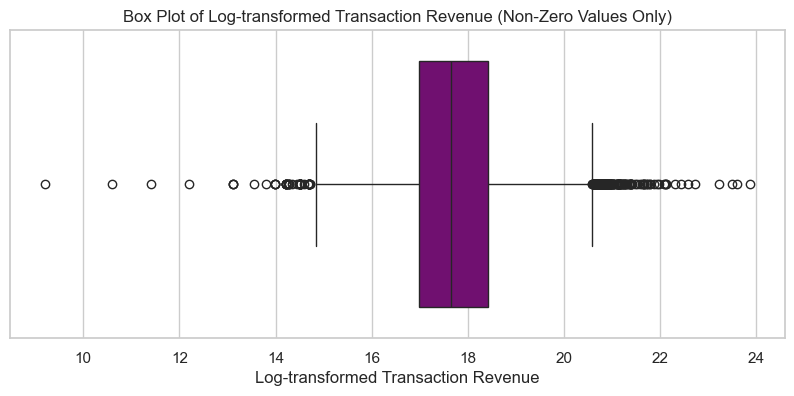

In [147]:
# Plot box plot for log-transformed non-zero revenue values
log_non_zero_revenue = np.log1p(non_zero_revenue)
plt.figure(figsize=(10, 4))

sns.boxplot(x=log_non_zero_revenue, color='purple')
plt.title("Box Plot of Log-transformed Transaction Revenue (Non-Zero Values Only)")
plt.xlabel("Log-transformed Transaction Revenue")

plt.show()

- The log transformation effectively reduces the skewness, compressing the range and making the revenue distribution appear more symmetric.
- This plot suggests that the majority of users’ log-transformed revenue values fall within a narrower range (roughly between 16 and 18 on the log scale), with some users generating significantly more or less revenue.
- Using the log-transformed revenue as a target variable for modeling would likely improve model performance, as it provides a more normally distributed target, reducing the influence of extreme values.

<br>

## Statistical Summary
### `totals_transactionRevenue` 

In [158]:
df['totals_transactionRevenue'].describe()

count    9.948700e+05
mean     1.315601e+06
std      4.604896e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.312950e+10
Name: totals_transactionRevenue, dtype: float64

<br>

### `log_transactionRevenue`

In [160]:
df['log_transactionRevenue'].describe()

count    994870.000000
mean          0.191350
std           1.838010
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          23.864375
Name: log_transactionRevenue, dtype: float64